In [0]:
# NBA players 2013-2014
# K-Means CLustering

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
#Load the data from colab
from google.colab import files
#uploaded = files.upload()
nba = pd.read_csv(r'nba_2013.csv',encoding= 'unicode_escape')
nba.head(7)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NaN,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,3,15,0.200000,649,1408,0.460938,0.459,296,360,0.822,166,599,765,178,63,68,123,147,1603,2013-2014,2013


In [11]:
nba.shape

(481, 31)

In [12]:
nba.mean()

age             26.509356
g               53.253638
gs              25.571726
mp            1237.386694
fg             192.881497
fga            424.463617
fg.              0.436436
x3p             39.613306
x3pa           110.130977
x3p.             0.285111
x2p            153.268191
x2pa           314.332640
x2p.             0.466947
efg.             0.480752
ft              91.205821
fta            120.642412
ft.              0.722419
orb             55.810811
drb            162.817048
trb            218.627859
ast            112.536383
stl             39.280665
blk             24.103950
tov             71.862786
pf             105.869023
pts            516.582121
season_end    2013.000000
dtype: float64

In [14]:
#Get the mean/average of specific columns

nba.loc[:,'fg'].mean()

192.88149688149687

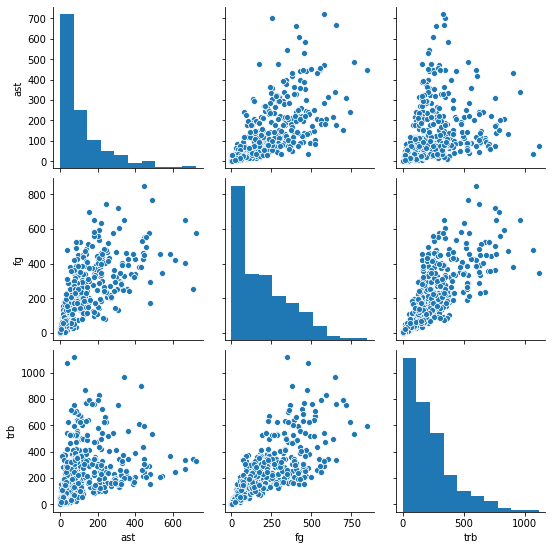

In [19]:
#Make a pairwise scatter plot
corr_col = ['ast','fg','trb']
sns.pairplot(nba[corr_col])

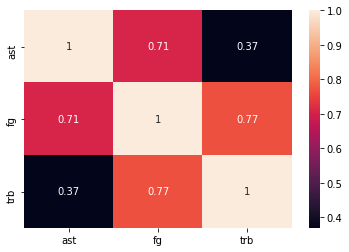

In [21]:
# HeatMap for correlations

correlation = nba[corr_col].corr()
sns.heatmap(correlation, annot=True)

In [23]:
# Creating CLusters of Players 

from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 5,random_state=1)
good_columns = nba._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_
print(labels)

[0 0 0 1 0 3 1 0 2 2 4 3 2 2 4 0 2 1 3 0 4 3 0 0 4 3 0 3 3 3 2 2 4 2 3 4 2
 1 2 3 0 1 0 4 0 2 3 3 0 2 2 2 2 3 3 2 0 2 4 1 4 2 4 3 2 3 3 3 3 0 3 4 4 2
 4 3 3 0 0 0 4 2 3 4 4 1 2 4 2 4 3 3 0 3 3 2 3 4 2 1 3 1 3 3 4 4 0 2 3 3 1
 2 3 3 3 1 0 2 3 3 3 0 4 1 4 0 0 0 1 1 2 4 4 1 3 3 1 3 0 0 4 4 0 3 4 3 4 3
 2 2 4 3 3 0 4 0 0 0 4 4 1 0 1 4 2 3 3 3 3 3 4 1 0 3 2 2 4 1 0 1 3 0 3 0 2
 1 2 3 3 0 3 3 3 4 0 4 0 1 4 0 4 4 4 2 4 2 3 4 0 3 3 0 1 0 2 1 2 2 1 3 4 4
 3 3 3 1 3 3 3 1 4 3 1 0 4 0 0 1 3 4 3 3 0 3 4 4 0 0 4 3 2 2 0 1 4 2 3 3 0
 2 3 3 4 3 4 1 3 4 3 0 0 3 1 4 2 0 4 1 1 3 2 0 4 2 0 0 4 3 1 3 3 2 0 0 3 3
 4 4 4 3 4 0 0 0 2 0 2 1 3 3 1 2 3 2 4 2 0 3 2 3 3 3 3 3 3 3 0 3 4 0 1 3 1
 3 0 0 3 4 2 3 3 0 2 3 4 1 2 4 4 0 4 3 2 4 3 3 3 0 3 3 0 2 3 3 3 1 0 3 0 2
 3 2 0 0 0 3 4 4 3 0 2 0 0 2 2 2 0 4 3 3 2 0 0 4 3 3 3 3 3 0 4 0 1 0 3 0 2
 3 1 0 3 2 4 4 0 3 1 3 2 0 3 3 3 1 3 3 2 4 1 4 2 3 0 4 0 3 1 3 0 0 4 2 3 2
 0 3 4 3 4 4 1 1 2 3 0 3 3 4 1 2 3 3 4 2 0 2 2 2 3 0 0 2 3 0 3 0 4 4 1 2 0]


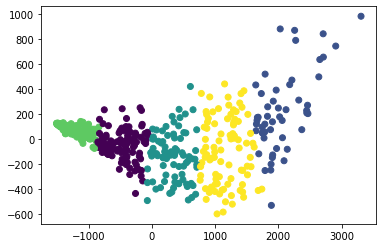

In [26]:
# Principal component Analysis

from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x = plot_columns[:,0],y = plot_columns[:,1],c=labels)
plt.show()

In [0]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nba[['fg']], nba[['ast']], test_size=0.2, random_state=42)

In [30]:
#Create the Linear Regression Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Create the model
lr.fit(x_train, y_train) #Train the model
predictions = lr.predict(x_test) #Make predictions on the test data

print(predictions[:20])
print(y_test[:20])



[[121.94310565]
 [ 24.72153471]
 [ 77.60579583]
 [252.28411286]
 [219.69886106]
 [ 70.12721345]
 [ 17.77713678]
 [178.03247351]
 [ 58.37515542]
 [ 70.12721345]
 [117.13544555]
 [ 30.06337926]
 [214.3570165 ]
 [ 24.18735025]
 [143.84466834]
 [ 22.05061243]
 [133.69516368]
 [  9.23018549]
 [131.55842586]
 [167.88296885]]
     ast
73    82
415   36
392   52
278  586
400  219
172   41
395   34
376   79
77    29
452  143
9     94
268   18
244   87
299   63
30   303
93    15
55   112
424    3
33   125
203  153


In [31]:
# Testing Model:
# Score = coefficient of determination R^2 of the prediction. 
#   best score is 1.0 
lr_confidence = lr.score(x_test, y_test)
print("lr confidence (R^2): ", lr_confidence)

# mean squared error = how close a regression line is to a set of points.
from sklearn.metrics import mean_squared_error
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, predictions))

lr confidence (R^2):  0.5877700445514937
Mean Squared Error (MSE):  5257.168578022499
